In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

import rpy2
from rpy2.robjects import r
NULL = r("NULL")
import sys
sys.path.append('../') # Add one directory back to the path

from PFAS_DR import PFAS_DR
%load_ext rpy2.ipython
%load_ext watermark
%watermark -iv

R[write to console]: The mod.exe had been created.



rpy2      : 3.4.4
seaborn   : 0.11.2
numpy     : 1.21.2
pandas    : 1.5.2
matplotlib: 3.5.3
sys       : 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]



In [2]:
model_path = '../pfoa_2compabandersenoral_1cmptDev'
param_path = '../data_files'

# Compile the model

Only have to run this cell once and only if model is currently not compiled in working directory

In [3]:
model_compile = PFAS_DR()
model_compile.pk_run.compile_pfas_model(model_path)

array([0], dtype=int32)

# Recreate each supplemental figure

Using the `PFAS_DR` object, create a `dosing_dict` that matches the dosing sceanarios outlined in Wambaugh et al., 2013 and plot the simulations against the data.

When comparing data, use the `plot_data` method to add time-course concentration data to the simulation plot with matplotlib keywords.

## Figure S4: PFOA, female, CD1 mouse

Running adult model for CD1 with 1 mg/kg PFOA
Running adult model for CD1 with 10 mg/kg PFOA
Running adult model for CD1 with 60 mg/kg PFOA


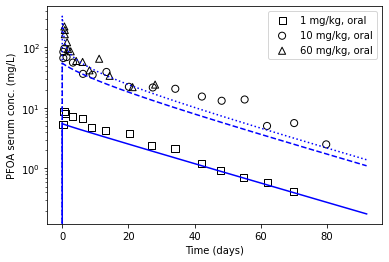

In [3]:
# Update
dosing_dict = {'chem': 'PFOA',
                   'ts': 0,
                   'tf': 92,
               't_dose': 0.001,
               't_step': 0.001,
                   'sex': 'Female',
                   'route': 'oral',
                   'strain': 'CD1',
                   'M_m_1': 0.02,
                   'Qcc': 8.68,
                   'dose': 1,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
              }

# Simulation 1
FigureS4 = PFAS_DR(**dosing_dict)
FigureS4.run_model()
FigureS4.plot_time_course(linestyle='-', color='blue')
time = np.array([5.600806683, 12.68540917, 22.61221206, 72.53880596, 149.1110287, 215.5056661, 315.3902017, 485.2952701, 644.9182606, 818.1566449, 1010.987403, 1147.433921, 1313.880283, 1487.055971, 1680.095715])/24.
conc = [5.331982508, 8.707767828, 7.990959562, 7.331359345, 6.562166945, 4.768660718, 4.164331201, 3.725284875, 2.393321967, 2.140949763, 1.186994171, 0.91672867, 0.707869423, 0.588305788, 0.416834033]
FigureS4.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')

# Simulation 2
#FigureS4.dosing_dict['dose'] = 10
FigureS4.update_p(dose=10)
FigureS4.run_model()
FigureS4.plot_time_course(linestyle='--', color='blue')
time = np.array([7.753355521, 7.951891578, 14.72301608, 31.11791474, 77.60670007, 150.5739259, 220.5422124, 320.6357334, 483.4875471, 656.7990763, 820.0897592, 1013.1713, 1156.368044, 1323.075637, 1485.551277, 1682.31096, 1914.953422])/24.
conc = [66.68428335, 84.18128102, 95.16050691, 69.17338742, 56.14027355, 36.53194947, 35.19725147, 39.28036627, 22.32283353, 21.75885054, 20.69652407, 15.40143011, 13.1202678, 13.76583193, 5.03088007, 5.611168672, 2.494151158]
FigureS4.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

# Simulation 3
#FigureS4.dosing_dict['dose'] = 60
FigureS4.update_p(dose=60)
FigureS4.run_model()
FigureS4.plot_time_course(linestyle=':', color='blue')
time = np.array([15.44401544, 18.66238943, 18.52654897, 34.93189691, 41.37909415, 61.3058448, 100.9921578, 147.6272329, 197.3552907, 267.7310986, 343.8435536, 510.1436252, 673.5596993])/24.
conc = [221.7908557, 193.798269, 165.2392569, 121.5965987, 93.98527963, 86.24328696, 59.68179461, 57.5095424, 41.79587713, 64.96498278, 33.90022884, 22.04714771, 24.29543275]
FigureS4.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='^')

FigureS4.ax[0].set_yscale('log')

## Figure S6: PFOA, male, rat

Running adult model for rat with 0.1 mg/kg PFOA
Running adult model for rat with 1 mg/kg PFOA
Running adult model for rat with 1 mg/kg PFOA
Running adult model for rat with 5 mg/kg PFOA
Running adult model for rat with 25 mg/kg PFOA


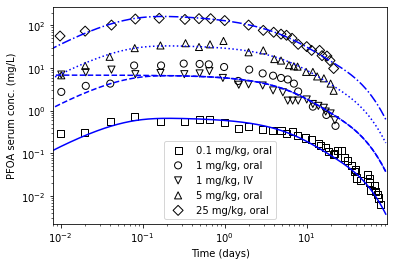

In [4]:
# Update
dosing_dict = {'chem': 'PFOA',
                   'tf': 92,
               't_dose': 0.001,
               't_step': 0.001,
                   'sex': 'Male',
                   'route': 'oral',
                   'strain': 'rat',
                   'M_m_1': 0.24,
                   'Qcc': 12.39,
                   'dose': 0.1,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   }
# Simulation 1: 0.1 mg/kg oral
FigureS6 = PFAS_DR(**dosing_dict)
FigureS6.run_model()
FigureS6.plot_time_course(linestyle='-', color='blue')
time = np.array([0.236120845, 0.469506697, 0.982963323, 1.921242077, 3.953802078, 7.86180718, 11.87481536, 15.63255088, 23.61208448, 35.05711065, 46.95066966, 69.70815402, 91.76700696, 116.7250797, 136.2474423, 161.7913221, 185.6336553, 232.0981302, 275.6122442,332.9569309, 356.6471895, 409.2044034, 438.3197551, 511.6290834,529.5178406, 577.0242031, 639.6908655, 685.2055871, 759.6210918, 842.1183567, 933.5750869, 917.6700696, 966.2168943, 1089.716264, 1339.262386, 1410.112399, 1410.112399, 1617.913221, 1459.416004, 1645.954822, 1733.029559, 1793.623739, 1888.510496])/24.
conc = [0.294460163, 0.313022259, 0.565213322, 0.751806705, 0.553812599, 0.565213322, 0.613211964, 0.613211964, 0.531696396, 0.376028913, 0.424931165, 0.361012404, 0.353730548, 0.346595571, 0.294460163, 0.332754467, 0.265936997, 0.230585428, 0.212536551, 0.169858974, 0.153405421, 0.138545658, 0.113004918, 0.092172586, 0.102058588, 0.115331224, 0.11770542, 0.079919888, 0.069295968, 0.05316964, 0.042493117, 0.036844416, 0.0265937, 0.023533223, 0.03194661, 0.026057287, 0.020404902, 0.017335567, 0.013301291, 0.012770112, 0.011072554, 0.00903134, 0.006518674]
FigureS6.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')

# Simulation 2: 1 mg/kg oral
#FigureS6.dosing_dict['dose'] = 1
FigureS6.update_p(dose=1)
FigureS6.run_model()
FigureS6.plot_time_course(linestyle='--', color='blue')
time = np.array([0.244376647, 0.485922674, 0.966216894, 1.888510496, 4.022329202, 7.596210918, 11.87481536, 15.36622416, 23.61208448, 35.05711065, 47.7644166, 69.70815402, 93.35750869, 116.7250797, 141.0112399, 167.4482438, 188.8510496, 285.2488358, 416.2967161, 538.6954205])/24.
conc = [2.769987926, 3.837698006, 4.336787491, 11.53312244, 11.53312244, 12.77011153, 12.51253003, 12.26014411, 10.63037714, 5.001670113, 9.21725855, 7.518067051, 6.652867125, 5.887236797, 5.426418371, 4.336787491, 2.827010579, 1.251253003, 0.799198881, 0.44260641]
FigureS6.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

# Simulation 3: 1 mg/kg IV
#FigureS6.dosing_dict['dose'] = 1
#FigureS6.dosing_dict['route'] = 'IV'
FigureS6.update_p(dose=1, route='IV')
FigureS6.run_model()
FigureS6.plot_time_course(linestyle='--', color='blue')
time = np.array([0.244376647, 0.485922674, 1, 1.95454096, 3.953802078, 7.727868111, 11.87481536, 15.63255088, 22.81439493, 35.66471895, 46.95066966, 69.70815402, 93.35750869, 122.9001007, 141.0112399, 161.7913221, 188.8510496, 240.2132809, 285.2488358, 332.9569309, 388.6442429, 409.2044034, 469.5066966, 529.5178406])/24.
conc = [7.072248661, 7.991988812, 9.21725855, 7.217837157, 7.672833113, 7.217837157, 7.518067051, 8.495785518, 5.887236797, 4.079617716, 4.163600256, 3.916700415, 3.005218863, 2.714115458, 1.733556709, 1.733556709, 1.733556709, 1.842836161, 1.443085408, 1.303299557, 1.177054197, 0.960065547, 0.867067878, 0.600843078]
FigureS6.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='v')

# Simulation 4: 5 mg/kg oral
#FigureS6.dosing_dict['dose'] = 5
#FigureS6.dosing_dict['route'] = 'oral'
FigureS6.update_p(dose=5, route='oral')
FigureS6.run_model()
FigureS6.plot_time_course(linestyle=':', color='blue')
time = np.array([0.244376647, 0.477644166, 0.949755769, 1.921242077, 3.953802078, 7.998067676, 11.67250797, 15.90349356, 23.20981302, 46.95066966, 70.91633267, 96.62168943, 116.7250797, 145.9416004, 167.4482438, 185.6336553, 236.1208448, 285.2488358, 321.7086117, 388.6442429, 469.5066966, 511.6290834])/24.
conc = [6.789822281, 11.30049182, 18.42836161, 29.44601633, 33.96045117, 38.37698006, 31.3022259, 36.10124039, 43.36787491, 23.53322331, 26.05728743, 16.30757485, 15.03111337, 11.77054197, 11.07255351, 10.84921286, 8.156510973, 8.156510973, 6.387188517, 5.768487381, 4.336787491, 2.944601633]
FigureS6.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='^')

# Simulation 5: 25 mg/kg oral
#FigureS6.dosing_dict['dose'] = 25
#FigureS6.dosing_dict['route'] = 'oral'
FigureS6.update_p(dose=25, route='oral')
FigureS6.run_model()
FigureS6.plot_time_course(linestyle='-.', color='blue')
time = np.array([0.236120845, 0.477644166, 1, 1.95454096, 3.820230365, 7.86180718, 11.67250797, 16.17913221, 24.02132809, 46.95066966, 70.91633267, 94.97557692, 116.7250797, 136.2474423, 159.0349356, 188.8510496, 240.2132809, 275.6122442, 344.5985398, 369.1171119, 423.5119525, 461.5078627, 511.6290834])/24.
conc = [56.52133218, 73.66422721, 102.0585885, 141.3977432, 147.2792598, 138.5456582, 144.3085408, 144.3085408, 130.3299557, 102.0585885, 76.72833113, 69.2959678, 62.58354748, 58.87236797, 50.01670113, 36.10124039, 31.94660991, 26.05728743, 26.05728743, 19.5900434, 19.19489942, 15.03111337, 9.79829346]
FigureS6.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='D')

x_lim = list(FigureS6.ax[0].get_xlim())
x_lim[0] = 0.008
FigureS6.ax[0].set_xlim(x_lim)
FigureS6.ax[0].set_yscale('log')
FigureS6.ax[0].set_xscale('log')

## Figure S13: PFOA, female, rat

There were some discrepancies between the reported dose in Wambaugh et al., 2013 supplementary the experimental dose in Kemper et al. To account for this, we corrected the simulated doses:

* 2 mg/kg in Wambaugh et al., 2013 --> 0.1 mg/kg from Kemper et al.
* 4.2 mg/kg in Wambaugh et al., 2013 --> 1 mg/kg from Kemper et al.

Running adult model for rat with 0.1 mg/kg PFOA
Running adult model for rat with 1 mg/kg PFOA
Running adult model for rat with 1 mg/kg PFOA
Running adult model for rat with 5 mg/kg PFOA
Running adult model for rat with 15 mg/kg PFOA


(0.001, 10.0)

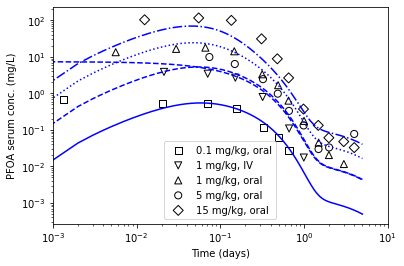

In [5]:
# Update
dosing_dict = {'chem': 'PFOA',
                   'tf': 5,
                   'ts':0,
                   'sex': 'Female',
                   'route': 'oral',
                   'strain': 'rat',
                   'M_m_1': 0.203,
                   'Qcc': 12.39,
                   'dose': 0.1,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.001,
                   't_step':0.001
                   }

# Simulation 1: 0.1 mg/kg oral
FigureS13 = PFAS_DR(**dosing_dict)
FigureS13.run_model()
FigureS13.plot_time_course(linestyle='-', color='blue')
time = np.array([-0.552986202, 0.032366183, 0.490708144, 1.674911607, 3.764754608, 7.982482379, 12.01675065, 15.91419127])/24.
conc = [0.609002619, 0.670152524, 0.532888246, 0.522950074, 0.385386888, 0.115747836, 0.060502553, 0.026627569]
FigureS13.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')

# Simulation 2: 0.1 mg/kg IV
#FigureS13.dosing_dict['dose'] = 0.1
#FigureS13.dosing_dict['route'] = 'IV'
FigureS13.update_p(dose=1, route='IV')
FigureS13.run_model()
FigureS13.plot_time_course(linestyle='--', color='blue')
time = np.array([-0.543782548, -0.09280351, 0.510956183, 1.701295414, 3.639584915, 7.710667802, 15.97125392, 23.92627873])/24.
conc = [5.276907134, 4.705802566, 3.887843557, 3.467685713, 2.706181863, 0.797368287, 0.109507869, 0.017522257]
FigureS13.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='v')

# Simulation 3: 1 mg/kg oral
#FigureS13.dosing_dict['dose'] = 1
#FigureS13.dosing_dict['route'] = 'oral'
FigureS13.update_p(dose=1, route='oral')
FigureS13.run_model()
FigureS13.plot_time_course(linestyle='--', color='blue')
time = np.array([-0.146798279, 0.135447106, 0.713436568, 1.595760183, 3.532822531, 7.618631263, 11.80322588, 15.71048373, 24.07353719, 35.99165535, 47.72385971, 72.01168864])/24.
conc = [10.90870831, 13.46135926, 16.6125071, 17.93584027, 14.26716242, 3.342381742, 1.681647439, 0.635190147, 0.176910941, 0.044820907, 0.020532825, 0.011641409]
FigureS13.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='^')

# Simulation 4: 1 mg/kg IV
#FigureS13.dosing_dict['dose'] = 5
#FigureS13.dosing_dict['route'] = 'oral'
FigureS13.update_p(dose=5, route='oral')
FigureS13.run_model()
FigureS13.plot_time_course(linestyle=':', color='blue')
time = np.array([-0.163978433, 1.781673991, 3.584362992, 7.786137763, 11.68971415, 15.900079, 23.79620042, 35.86955355, 47.98892494, 95.69759861])/24.
conc = [14.25456996, 9.919267501, 6.394332773, 2.462030017, 0.984822653, 0.331715484, 0.132814226, 0.030005033, 0.033108925, 0.077631745]
FigureS13.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

# Simulation 4: 15 mg/kg oral
#FigureS13.dosing_dict['dose'] = 15
#FigureS13.dosing_dict['route'] = 'oral'
FigureS13.update_p(dose=15, route='oral')
FigureS13.run_model()
FigureS13.plot_time_course(linestyle='-.', color='blue')
time = np.array([-0.422294318, -0.452973164, 0.299885721, 1.327627068, 3.2597808, 7.475054263, 11.54859146, 15.76631923, 23.72993412, 35.62596351, 47.65391194, 71.77300722, 95.75282054])/24.
conc = [79.58208081, 128.3160516, 104.0094447, 116.6734181, 100.180296, 31.26047071, 8.865438818, 2.66266288, 0.372709533, 0.13319004, 0.06101976, 0.047872782, 0.032854971]
FigureS13.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='D')


FigureS13.ax[0].set_yscale('log')
FigureS13.ax[0].set_xscale('log')
FigureS13.ax[0].set_xlim(1e-3, 1e1)

## Figure S9: PFOS, female, CD1 mouse

Running adult model for CD1 with 1 mg/kg PFOS
Running adult model for CD1 with 20 mg/kg PFOS


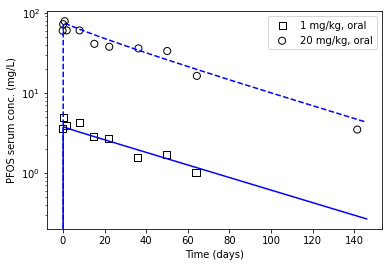

In [6]:
# Update
dosing_dict = {'chem': 'PFOS',
                   'tf': 146,
                   'sex': 'Female',
                   'route': 'oral',
                   'strain': 'CD1',
                   'M_m_1': 0.02,
                   'Qcc': 8.68,
                   'dose': 1,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.01,
               
                   }

# Simulation 1
FigureS9 = PFAS_DR(**dosing_dict)
FigureS9.run_model()
FigureS9.plot_time_course(linestyle='-', color='blue')
time = np.array([-8.520141102, 3.797792444, 44.83386436, 186.9879381, 352.0710059, 523.5690715, 860.0221893, 1191.511152, 1533.952549])/24.
conc = [3.626741183, 4.993150877, 3.873512854, 4.255451318, 2.866916216, 2.684272262, 1.555789865, 1.69319704, 1.028613423]
FigureS9.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')

# Simulation 2
#FigureS9.dosing_dict['dose'] = 20
FigureS9.update_p(dose=20)
FigureS9.run_model()
FigureS9.plot_time_course(linestyle='--', color='blue')
time = np.array([-4.281406463, 1.920232135, 19.7997269, 43.07009558, 190.9990897, 362.0135412, 533.4831589, 870.6901457, 1201.937301, 1544.051548, 3393.789827])/24.
conc = [59.78155288, 72.15201135, 78.52446838, 60.34638436, 60.34638436, 41.03974859, 37.70927034, 35.97723778, 33.36993159, 16.32926231, 3.492853045]
FigureS9.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

FigureS9.ax[0].set_yscale('log')

## Figure S10: PFOS, male, CD1 mouse

Running adult model for CD1 with 1 mg/kg PFOS
Running adult model for CD1 with 20 mg/kg PFOS


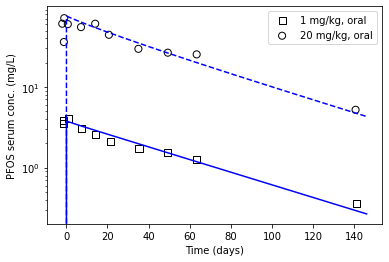

In [7]:
# Update
dosing_dict = {'chem': 'PFOS',
                   'tf': 146,
                   'sex': 'Female',
                   'route': 'oral',
                   'strain': 'CD1',
                   'M_m_1': 0.02,
                   'Qcc': 8.68,
                   'dose': 1,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   't_dose':0.01,
                   }

# Simulation 1
FigureS10 = PFAS_DR(**dosing_dict)
FigureS10.run_model()
FigureS10.plot_time_course(linestyle='-', color='blue')
time = np.array([-27.47075811, -27.68890366, 25.33604803, 179.5649554, 345.3555773, 517.1452018, 848.3836453, 1179.37278, 1522.422247, 3379.962811])/24.
conc = [3.536504589, 3.850468191, 4.042236501, 3.094045761, 2.610045658, 2.122943041, 1.726746481, 1.547872469, 1.258999082, 0.360155286]
FigureS10.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')

# Simulation 2
#FigureS10.dosing_dict['dose'] = 20
FigureS10.update_p(dose=20)
FigureS10.run_model()
FigureS10.plot_time_course(linestyle='--', color='blue')
time = np.array([-27.51750358, -46.574076, -23.35715621, 18.41771757, 172.1791702, 337.2841917, 497.5432655, 841.091351, 1183.891509, 1520.630337, 3373.106808])/24.
conc = [36.0155286, 60.72992182, 71.12205639, 59.99646703, 55.10441081, 60.72992182, 44.27917859, 29.65221057, 26.58053218, 25.31952141, 5.217226137]
FigureS10.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

FigureS10.ax[0].set_yscale('log')

## Figure S11: PFOS, male, rat

Running adult model for rat with 2 mg/kg PFOS
Running adult model for rat with 2 mg/kg PFOS
Running adult model for rat with 15 mg/kg PFOS


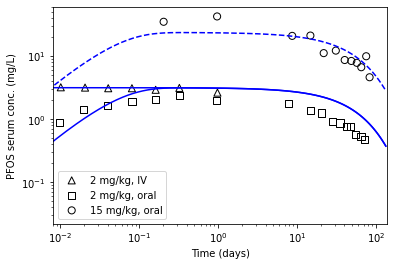

In [8]:
#Update
dosing_dict = {'chem': 'PFOS',
                   'tf': 134,
               't_dose': 0.001,
               't_step': 0.001,
                   'sex': 'Male',
                   'route': 'IV',
                   'strain': 'rat',
                   'M_m_1': 0.24,
                   'Qcc': 12.39,
                   'dose': 2,
                   #'tz_daily': np.array([0]),
                   'tm_daily_dose': None, # None -> one dose
                   'sample_posterior': False,
                   'param_path': param_path,
                   'model_path': model_path,
                   'dev': False,
                   }
# Simulation 1: 2 mg/kg IV
FigureS11 = PFAS_DR(**dosing_dict)
FigureS11.run_model()
FigureS11.plot_time_course(linestyle='-', color='blue')
time = np.array([0.243183534, 0.493905458, 0.971370307, 1.94126187, 3.88034363, 7.752921262, 23.56368137])/24.
conc = [3.183759308, 3.147584866, 3.076464374, 3.076464374, 2.905614502, 3.111821445, 2.621639561]
FigureS11.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='^')

# Simulation 2: 2 mg/kg oral
#FigureS11.dosing_dict['dose'] = 2
#FigureS11.dosing_dict['route'] = 'oral'
FigureS11.update_p(dose=2, route='oral')
FigureS11.run_model()
FigureS11.plot_time_course(linestyle='-', color='blue')
time = np.array([0.236542384, 0.471950905, 0.957919127, 1.944599978, 3.82309512, 7.760669392, 23.21139788, 188.3349948, 358.949255, 487.5917632, 684.4798522, 844.0610781, 1024.38564, 1146.606847, 1326.791729, 1558.967063, 1717.783811])/24.
conc = [0.875278343, 1.398363657, 1.659823143, 1.882142002, 2.038880821, 2.338542087, 1.947783686, 1.777618211, 1.3824752, 1.247361504, 0.926744631, 0.865333274, 0.771890351, 0.771890351, 0.573486705, 0.535484222, 0.477660015]
FigureS11.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='s')

# Simulation 3: 15 mg/kg oral
#FigureS11.dosing_dict['dose'] = 15
#FigureS11.dosing_dict['route'] = 'oral'
FigureS11.update_p(dose=15, route='oral')
FigureS11.run_model()
FigureS11.plot_time_course(linestyle='--', color='blue')
time = np.array([4.897786237, 23.33600528, 209.002419, 355.5520534, 524.4536254, 747.1613993, 967.8835526, 1174.332961, 1379.82953, 1570.40773, 1812.767699, 2001.994155])/24.
conc = [34.68654722, 42.12387516, 20.74130173, 20.97967656, 11.06326094, 12.12231009, 8.604031947, 8.314070002, 7.763132556, 6.615430233, 9.868595862, 4.589328663]
FigureS11.plot_data(time, conc, label_style='dose/route', s=50, facecolors='none', edgecolors='black', marker='o')

x_lim = list(FigureS11.ax[0].get_xlim())
x_lim[0] = 0.008
FigureS11.ax[0].set_xlim(x_lim)
FigureS11.ax[0].set_yscale('log')
FigureS11.ax[0].set_xscale('log')
